In [1]:
# 🧠 Bank Customer Churn Prediction using Neural Network

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# Step 2: Load Dataset
dataset = pd.read_csv("Churn_Modelling.csv")
print(dataset.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [4]:
# Step 3: Feature and Target Selection
X = dataset.iloc[:, 3:13]   # Select columns from CreditScore to EstimatedSalary
y = dataset.iloc[:, 13]     # Target column (Exited)

In [5]:
# Encode categorical features
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])

In [6]:
# One-hot encode Geography column
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)

In [7]:
# Step 4: Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 5: Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
# Step 6: Build the Neural Network
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))  # helps prevent overfitting
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # output layer

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 7: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Step 8: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4005 - loss: 0.9938 - val_accuracy: 0.7885 - val_loss: 0.5581
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7919 - loss: 0.5327 - val_accuracy: 0.8030 - val_loss: 0.4660
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8020 - loss: 0.4756 - val_accuracy: 0.8080 - val_loss: 0.4411
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8035 - loss: 0.4649 - val_accuracy: 0.8160 - val_loss: 0.4269
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.4545 - val_accuracy: 0.8175 - val_loss: 0.4197
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8002 - loss: 0.4620 - val_accuracy: 0.8185 - val_loss: 0.4134
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8169 - loss: 0.4360 - val_accuracy: 0.8225 - val_loss: 0.4079
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8103 - loss: 0.4387 - val_accuracy: 0.

In [12]:
# Step 9: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [13]:
# Print accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("\n✅ Final Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:\n", cm)


✅ Final Accuracy: 83.70%

Confusion Matrix:
 [[1586   21]
 [ 305   88]]


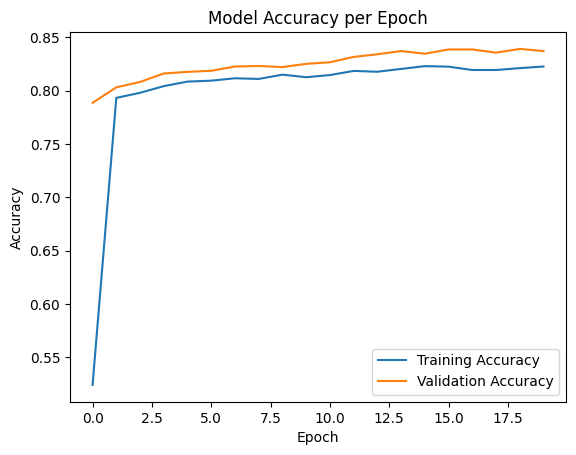

In [14]:
# Step 10: Plot Accuracy vs Epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()